In [1]:
import requests 
import pandas as pd
import matplotlib.pyplot as plt
import pandasql as pq
from bs4 import BeautifulSoup

In [2]:
 
try:
    url = requests.get('https://www.imdb.com/chart/top/')
    url.raise_for_status()
    soup = BeautifulSoup(url.text,"html.parser")
except Exception as Error:
    print(Error)

In [3]:
movies_data = soup.find('tbody', class_ = 'lister-list').find_all("tr")
movies_data

[<tr>
 <td class="posterColumn">
 <span data-value="1" name="rk"></span>
 <span data-value="9.23591110443209" name="ir"></span>
 <span data-value="7.791552E11" name="us"></span>
 <span data-value="2733739" name="nv"></span>
 <span data-value="-1.7640888955679106" name="ur"></span>
 <a href="/title/tt0111161/"> <img alt="The Shawshank Redemption" height="67" src="https://m.media-amazon.com/images/M/MV5BNDE3ODcxYzMtY2YzZC00NmNlLWJiNDMtZDViZWM2MzIxZDYwXkEyXkFqcGdeQXVyNjAwNDUxODI@._V1_UX45_CR0,0,45,67_AL_.jpg" width="45"/>
 </a> </td>
 <td class="titleColumn">
       1.
       <a href="/title/tt0111161/" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">The Shawshank Redemption</a>
 <span class="secondaryInfo">(1994)</span>
 </td>
 <td class="ratingColumn imdbRating">
 <strong title="9.2 based on 2,733,739 user ratings">9.2</strong>
 </td>
 <td class="ratingColumn">
 <div class="seen-widget seen-widget-tt0111161 pending" data-titleid="tt0111161">
 <div class="boundary">
 <div clas

In [4]:
rank_data = []
name_data = []
year_data = []
rating_data = []

for movie in movies_data:
    full_movie = movie.find('td', class_="titleColumn").get_text(strip=True)\
    .split(".",1)
    Rank = rank_data.append(full_movie[0])
    name = name_data.append (movie.find('td', class_="titleColumn").a.text)
    year = year_data.append (movie.find('td', class_="titleColumn").span.text.strip("()"))
    rating = rating_data.append(movie.find('td', class_="ratingColumn imdbRating").strong.text)
    
df = pd.DataFrame({'Rank': rank_data, 'Title': name_data,\
                  'year_of_release' : year_data, 'IMDb_Rating': rating_data})

In [5]:
pd.set_option('display.max_rows', 250)
df

,Rank,Title,year_of_release,IMDb_Rating
0,1,The Shawshank Redemption,1994,9.2
1,2,The Godfather,1972,9.2
2,3,The Dark Knight,2008,9.0
3,4,The Godfather Part II,1974,9.0
4,5,12 Angry Men,1957,9.0
5,6,Schindler's List,1993,8.9
6,7,The Lord of the Rings: The Return of the King,2003,8.9
7,8,Pulp Fiction,1994,8.8
8,9,The Lord of the Rings: The Fellowship of the Ring,2001,8.8
9,10,"Il buono, il brutto, il cattivo",1966,8.8


1995    8
2004    7
2009    6
Name: year_of_release, dtype: int64


<AxesSubplot:>

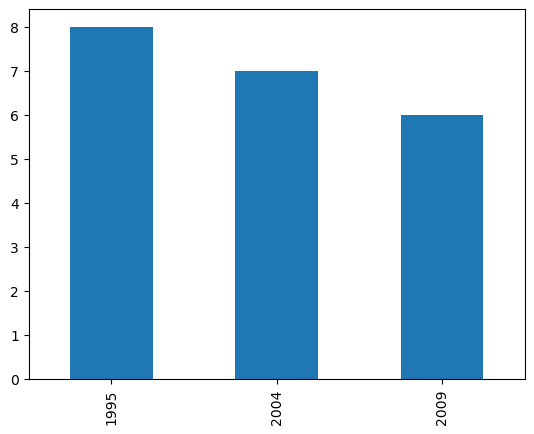

In [6]:
#The highest number of movies that were released in a single year among the top 250 movies.(top 3 )
df2 = df['year_of_release'].value_counts().nlargest(3)
print(df2)
df2.plot(kind='bar')

In [7]:
df_filtered = df[df['year_of_release'].isin(df2.index)]
df_filtered.sort_values('year_of_release',axis=0, ascending=True )

,Rank,Title,year_of_release,IMDb_Rating
18,19,Se7en,1995,8.6
179,180,Before Sunrise,1995,8.1
228,229,La haine,1995,8.0
108,109,Heat,1995,8.2
135,136,Casino,1995,8.2
73,74,Toy Story,1995,8.3
41,42,The Usual Suspects,1995,8.5
74,75,Braveheart,1995,8.3
90,91,Eternal Sunshine of the Spotless Mind,2004,8.3
123,124,Der Untergang,2004,8.2


In [8]:
q = "select year_of_release ,AVG(IMDb_Rating) as average_imdb_rating from df_filtered group by year_of_release order by 2 desc "
query = pq.sqldf(q,locals())
query

,year_of_release,average_imdb_rating
0,1995,8.275000
1,2009,8.166667
2,2004,8.100000


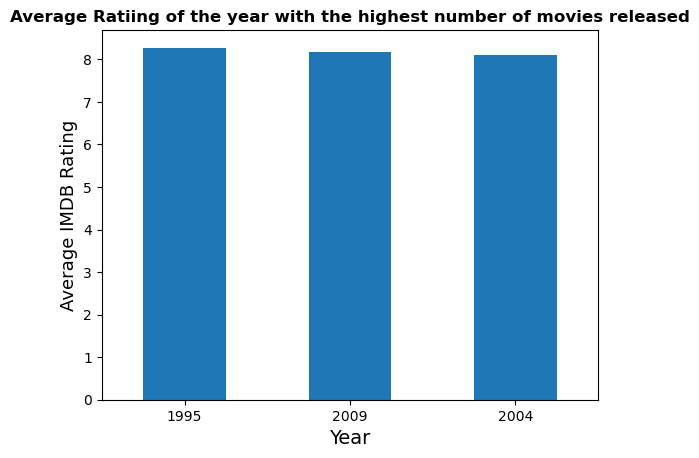

In [9]:
ax = query.plot.bar(x='year_of_release', y='average_imdb_rating', rot=0)
ax.legend().remove()
ax.set_title("Average Ratiing of the year with the highest number of movies released",fontweight='bold')
ax.set_xlabel('Year',fontsize=14)
ax.set_ylabel('Average IMDB Rating',fontsize=13)
plt.show()

In [10]:
df.to_excel('Desktop\\imdb_top_250.xlsx',sheet_name='Top 250')